In [14]:
import pandas as pd 

pd_data = pd.read_csv('./hand_gasture/user_10/user_10_loc.csv')
df = pd.DataFrame(pd_data)

In [19]:
df

,image,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,user_10/A0.jpg,186,84,286,184
1,user_10/A1.jpg,186,84,286,184
2,user_10/A2.jpg,185,90,285,190
3,user_10/A3.jpg,180,88,290,198
4,user_10/A4.jpg,173,102,293,222
5,user_10/A5.jpg,194,52,304,162
6,user_10/A6.jpg,194,62,304,172
7,user_10/A7.jpg,199,69,299,169
8,user_10/A8.jpg,195,61,305,171
9,user_10/A9.jpg,188,58,308,178


In [22]:
d= df.values.tolist()

In [59]:
d[0]
# d

['user_10/A0.jpg', 186, 84, 286, 184]

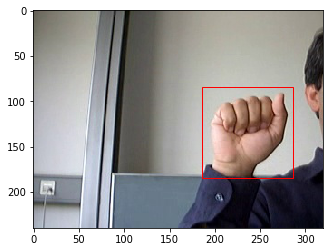

In [50]:
# 显示框体是否准确
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

lena = Image.open('hand_gasture/user_10/A0.jpg')
plt.imshow(lena)
currentAxis=plt.gca()  # 坐标x,y 宽 高
rect_1=patches.Rectangle((186, 84),100,100,linewidth=1,edgecolor='r',facecolor='none')
# rect_2=patches.Rectangle((496, 450),234,267,linewidth=1,edgecolor='r',facecolor='none')
currentAxis.add_patch(rect_1)
# currentAxis.add_patch(rect_2)

In [54]:
import cv2
img = cv2.imread('hand_gasture/user_10/A0.jpg')
crop = img[84:184,186:286,:]

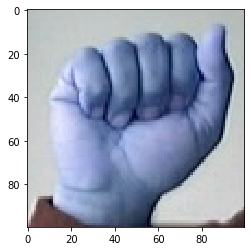

In [55]:
plt.imshow(crop)

In [62]:
import os
from shutil import copyfile
root = './hand_gasture/'
target_root = './hand_gasture/crop_hand_gasture'
# os.mkdir(target_root)
gasture_list = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
for t in gasture_list:
    type_folder_path = os.path.join(target_root,t)
    if not os.path.exists(type_folder_path):
        os.mkdir(type_folder_path)
    

    
for folder in os.listdir(root):
    if not folder.startswith('u'):
            continue
    folder_path = os.path.join(root,folder)   # usr_i
    csv_path = os.path.join(folder_path,'%s_loc.csv'%folder)
    
    pd_data = pd.read_csv(csv_path)
    df = pd.DataFrame(pd_data)
    list_data = df.values.tolist()
    for i in list_data:
        image = cv2.imread(os.path.join(root,i[0]))
        crop_image = image[i[2]:i[4],i[1]:i[3],:]
        cv2.imwrite(os.path.join(root,i[0].split('.')[0]+'_crop'+'.jpg'),crop_image)
    for name in os.listdir(folder_path):
        if name.endswith('csv') or not name.endswith('_crop.jpg'):  # 将crop图片按类别复制到crop文件夹
            continue 
        categorical = name[0]
#         print(categorical)
        src = os.path.join(folder_path,name)
        print(src,name)
        dst = os.path.join(target_root,categorical,folder+'_crop_'+name)
        print(dst)
        copyfile(src,dst)




./hand_gasture/user_6/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_6_crop_A7_crop.jpg
./hand_gasture/user_6/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_6_crop_G8_crop.jpg
./hand_gasture/user_6/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_6_crop_R0_crop.jpg
./hand_gasture/user_6/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_6_crop_A6_crop.jpg
./hand_gasture/user_6/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_6_crop_V6_crop.jpg
./hand_gasture/user_6/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_6_crop_R2_crop.jpg
./hand_gasture/user_6/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_6_crop_T7_crop.jpg
./hand_gasture/user_6/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_6_crop_R7_crop.jpg
./hand_gasture/user_6/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_6_crop_V5_crop.jpg
./hand_gasture/user_6/G0_crop.jpg G0_crop.jpg
./hand_ga

./hand_gasture/user_7/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_7_crop_A7_crop.jpg
./hand_gasture/user_7/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_7_crop_G8_crop.jpg
./hand_gasture/user_7/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_7_crop_R0_crop.jpg
./hand_gasture/user_7/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_7_crop_A6_crop.jpg
./hand_gasture/user_7/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_7_crop_V6_crop.jpg
./hand_gasture/user_7/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_7_crop_R2_crop.jpg
./hand_gasture/user_7/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_7_crop_T7_crop.jpg
./hand_gasture/user_7/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_7_crop_R7_crop.jpg
./hand_gasture/user_7/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_7_crop_V5_crop.jpg
./hand_gasture/user_7/G0_crop.jpg G0_crop.jpg
./hand_ga

./hand_gasture/user_10/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_10_crop_A7_crop.jpg
./hand_gasture/user_10/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_10_crop_G8_crop.jpg
./hand_gasture/user_10/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_10_crop_R0_crop.jpg
./hand_gasture/user_10/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_10_crop_A6_crop.jpg
./hand_gasture/user_10/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_10_crop_V6_crop.jpg
./hand_gasture/user_10/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_10_crop_R2_crop.jpg
./hand_gasture/user_10/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_10_crop_T7_crop.jpg
./hand_gasture/user_10/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_10_crop_R7_crop.jpg
./hand_gasture/user_10/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_10_crop_V5_crop.jpg
./hand_gasture/user_10/G0_crop.jpg G0

./hand_gasture/user_3/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_3_crop_A7_crop.jpg
./hand_gasture/user_3/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_3_crop_G8_crop.jpg
./hand_gasture/user_3/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_3_crop_R0_crop.jpg
./hand_gasture/user_3/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_3_crop_A6_crop.jpg
./hand_gasture/user_3/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_3_crop_V6_crop.jpg
./hand_gasture/user_3/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_3_crop_R2_crop.jpg
./hand_gasture/user_3/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_3_crop_T7_crop.jpg
./hand_gasture/user_3/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_3_crop_R7_crop.jpg
./hand_gasture/user_3/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_3_crop_V5_crop.jpg
./hand_gasture/user_3/G0_crop.jpg G0_crop.jpg
./hand_ga

./hand_gasture/user_5/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_5_crop_A7_crop.jpg
./hand_gasture/user_5/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_5_crop_G8_crop.jpg
./hand_gasture/user_5/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_5_crop_R0_crop.jpg
./hand_gasture/user_5/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_5_crop_A6_crop.jpg
./hand_gasture/user_5/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_5_crop_V6_crop.jpg
./hand_gasture/user_5/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_5_crop_R2_crop.jpg
./hand_gasture/user_5/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_5_crop_T7_crop.jpg
./hand_gasture/user_5/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_5_crop_R7_crop.jpg
./hand_gasture/user_5/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_5_crop_V5_crop.jpg
./hand_gasture/user_5/G0_crop.jpg G0_crop.jpg
./hand_ga

./hand_gasture/user_9/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_9_crop_A7_crop.jpg
./hand_gasture/user_9/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_9_crop_G8_crop.jpg
./hand_gasture/user_9/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_9_crop_R0_crop.jpg
./hand_gasture/user_9/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_9_crop_A6_crop.jpg
./hand_gasture/user_9/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_9_crop_V6_crop.jpg
./hand_gasture/user_9/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_9_crop_R2_crop.jpg
./hand_gasture/user_9/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_9_crop_T7_crop.jpg
./hand_gasture/user_9/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_9_crop_R7_crop.jpg
./hand_gasture/user_9/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_9_crop_V5_crop.jpg
./hand_gasture/user_9/G0_crop.jpg G0_crop.jpg
./hand_ga

./hand_gasture/user_4/A7_crop.jpg A7_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_4_crop_A7_crop.jpg
./hand_gasture/user_4/G8_crop.jpg G8_crop.jpg
./hand_gasture/crop_hand_gasture/G/user_4_crop_G8_crop.jpg
./hand_gasture/user_4/R0_crop.jpg R0_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_4_crop_R0_crop.jpg
./hand_gasture/user_4/A6_crop.jpg A6_crop.jpg
./hand_gasture/crop_hand_gasture/A/user_4_crop_A6_crop.jpg
./hand_gasture/user_4/V6_crop.jpg V6_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_4_crop_V6_crop.jpg
./hand_gasture/user_4/R2_crop.jpg R2_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_4_crop_R2_crop.jpg
./hand_gasture/user_4/T7_crop.jpg T7_crop.jpg
./hand_gasture/crop_hand_gasture/T/user_4_crop_T7_crop.jpg
./hand_gasture/user_4/R7_crop.jpg R7_crop.jpg
./hand_gasture/crop_hand_gasture/R/user_4_crop_R7_crop.jpg
./hand_gasture/user_4/V5_crop.jpg V5_crop.jpg
./hand_gasture/crop_hand_gasture/V/user_4_crop_V5_crop.jpg
./hand_gasture/user_4/G0_crop.jpg G0_crop.jpg
./hand_ga

In [72]:
import os
from shutil import copyfile
import random
root = './hand_gasture/color_hand_gasture/train_val/'
train_root = './hand_gasture/color_hand_gasture/train/'
val_root = './hand_gasture/color_hand_gasture/val/'
# os.mkdir(target_root)
gasture_list = ['A','B','C','D','E','F','H','I','J','K']
for t in gasture_list:
    val_folder_path = os.path.join(val_root,t)
    train_folder_path = os.path.join(train_root,t)
    if not os.path.exists(train_folder_path):
        os.mkdir(train_folder_path)
    if not os.path.exists(val_folder_path):
        os.mkdir(val_folder_path)
for categorical in os.listdir(root):
    categorical_path = os.path.join(root,categorical)
    for name in os.listdir(categorical_path):
        if random.uniform(0,1)>0.9:
            copyfile(os.path.join(categorical_path,name),
                           os.path.join(val_root,categorical,name))
        else:
            copyfile(os.path.join(categorical_path,name),
                           os.path.join(train_root,categorical,name))

In [65]:
import random

random.uniform(0,1)

0.824960555462889